In [1]:
# reading data
import glob

all_patches = glob.glob('./data/**/*.png', recursive=True)

In [2]:
# exploring data
import cv2
import numpy as np

print(len(all_patches))

for img_name in all_patches[:50]:
    img = cv2.imread(img_name)
    height, width, _ = img.shape
    if (height != 50 or width != 50):
        print("height: {} width: {} path: {}".format(height, width, img_name))

277524
height: 30 width: 50 path: ./data/9036/0/9036_idx5_x1601_y2851_class0.png
height: 30 width: 50 path: ./data/9036/0/9036_idx5_x701_y2851_class0.png


In [3]:
from matplotlib import pyplot as plt

i = 0
plt.figure(figsize=(10, 10))
for img_name in all_patches[:36]:
    img = cv2.imread(img_name, 3)
    plt.subplot(6, 6, i + 1)#.set_title(img_name[14:18])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    i += 1

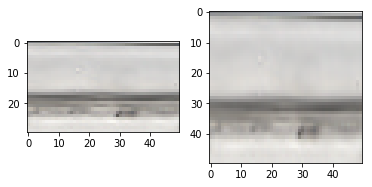

In [4]:
img = cv2.imread('./data/9036/0/9036_idx5_x1601_y2851_class0.png')
img_resized = cv2.resize(img, (50,50)) # default interpolation: INTER_LINEAR
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

In [5]:
# preprocessing

class0 = []
class1 = []
for name in glob.glob('./data/**/*class0.png', recursive=True):
    class0.append(name)
for name in glob.glob('./data/**/*class1.png', recursive=True):
    class1.append(name)


In [6]:
print(class0[:5])
print(class1[:5])

['./data/9036/0/9036_idx5_x1051_y2401_class0.png', './data/9036/0/9036_idx5_x2951_y951_class0.png', './data/9036/0/9036_idx5_x3001_y1451_class0.png', './data/9036/0/9036_idx5_x3051_y801_class0.png', './data/9036/0/9036_idx5_x951_y1901_class0.png']
['./data/9036/1/9036_idx5_x1851_y1351_class1.png', './data/9036/1/9036_idx5_x1851_y1451_class1.png', './data/9036/1/9036_idx5_x1751_y1601_class1.png', './data/9036/1/9036_idx5_x1801_y1501_class1.png', './data/9036/1/9036_idx5_x1801_y1201_class1.png']


In [33]:
def prepare_data_resize(patches):
    """ divide initial data into images and labels
    Args: 
        patches: list of file path names
    Returns:
        array with resized images, array with corresponding labels
        (0: non-IDC, 1: IDC)
    """
    X = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    for img_name in patches:
        image = cv2.imread(img_name)
        image_resized = cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC) # TODO: interpolation?
        X.append(image_resized)
        if img_name in class0:
            y.append(0)
        else:
            y.append(1)
    return X, y

In [50]:
def prepare_data_pad(patches):
    """ divide initial data into images and labels
    Args: 
        patches: list of file path names
    Returns:
        array with padded images, array with corresponding labels
        (0: non-IDC, 1: IDC)
    """
    X = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    #i = 0
    for img_name in patches:
        image = cv2.imread(img_name)
        orig_height, orig_width, _ = image.shape
        if (orig_height != 50 or orig_width != 50):
            #print(i)
            height_diff = HEIGHT - orig_height
            width_diff = WIDTH - orig_width
            
            top = height_diff // 2 # floor division
            bottom = height_diff - top
            left = width_diff // 2
            right = width_diff - left
            
            constant = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255,255,255])
            X.append(constant)
        else:
            X.append(image)
        y.append(0) if img_name in class0 else y.append(1)
        #i += 1
    return X, y

In [51]:
X_padded, y_padded = prepare_data_pad(all_patches[0:10000]) 

In [52]:
imgs0_pad = [X_padded[i] for i in range(len(X_padded)) if y_padded[i]==0]
imgs1_pad = [X_padded[i] for i in range(len(X_padded)) if y_padded[i]==1]

(-0.5, 49.5, 49.5, -0.5)

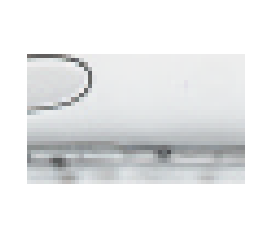

In [53]:
plt.imshow(X_padded[264])
plt.axis('off')

In [54]:
scaled_X_pad = np.array(X_padded)/255.0 # Min-Max Scaling
imgs0_pad_scaled = [scaled_X_pad[i] for i in range(len(scaled_X_pad)) if y_padded[i]==0]
imgs1_pad_scaled = [scaled_X_pad[i] for i in range(len(scaled_X_pad)) if y_padded[i]==1]

In [34]:
X, y = prepare_data_resize(all_patches[0:10000]) # playing around with small data size because TIME

In [35]:
# statistics 
print("Number of images: {}".format(len(X)))
imgs0 = [X[i] for i in range(len(X)) if y[i]==0]
imgs1 = [X[i] for i in range(len(X)) if y[i]==1]
print("Non-IDC: {}".format(len(imgs0)))
print("IDC: {}".format(len(imgs1)))

Number of images: 10000
Non-IDC: 8596
IDC: 1404


(-0.5, 49.5, 49.5, -0.5)

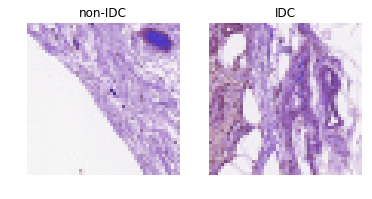

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('non-IDC')
ax1.imshow(imgs0[1])
ax1.set_axis('off')
ax2.set_title('IDC')
ax2.imshow(imgs1[1])
ax2.set_axis('off')

In [38]:
# TODO: put scaling inside prepare_data function
max_val = max(map(lambda x: np.max(x), X))
min_val = min(map(lambda x: np.min(x), X))
print("Pixel values before scaling in range from {} to {}".format(min_val, max_val))

scaled_X = np.array(X)/255.0 # Min-Max Scaling
max_val_scaled = max(map(lambda x: np.max(x), scaled_X))
min_val_scaled = min(map(lambda x: np.min(x), scaled_X))
print("Pixel values after scaling in range from {} to {}".format(min_val_scaled, max_val_scaled))

Pixel values before scaling in range from 0 to 255
Pixel values after scaling in range from 0.0 to 1.0


In [39]:
imgs0_scaled = [scaled_X[i] for i in range(len(scaled_X)) if y[i]==0]
imgs1_scaled = [scaled_X[i] for i in range(len(scaled_X)) if y[i]==1]